<a href="https://colab.research.google.com/github/0201shj/CNN-Cats-Dogs/blob/main/3_cnn_Image_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Augmentation

In [3]:
!unzip training_data.zip

Archive:  training_data.zip
  inflating: training_data/dog.3410.jpg  
  inflating: training_data/dog.10044.jpg  
  inflating: training_data/dog.3520.jpg  
  inflating: training_data/dog.2095.jpg  
  inflating: training_data/dog.4725.jpg  
  inflating: training_data/dog.10608.jpg  
  inflating: training_data/dog.8850.jpg  
  inflating: training_data/dog.4007.jpg  
  inflating: training_data/dog.4952.jpg  
  inflating: training_data/dog.8365.jpg  
  inflating: training_data/dog.2133.jpg  
  inflating: training_data/dog.11954.jpg  
  inflating: training_data/dog.7086.jpg  
  inflating: training_data/dog.9312.jpg  
  inflating: training_data/dog.11098.jpg  
  inflating: training_data/dog.9425.jpg  
  inflating: training_data/dog.9729.jpg  
  inflating: training_data/dog.7569.jpg  
  inflating: training_data/dog.1656.jpg  
  inflating: training_data/dog.4705.jpg  
  inflating: training_data/dog.12052.jpg  
  inflating: training_data/dog.1734.jpg  
  inflating: training_data/dog.6384.jpg  
 

In [4]:
!unzip validation_data.zip

Archive:  validation_data.zip
  inflating: validation_data/dog.11332.jpg  
  inflating: validation_data/dog.8218.jpg  
  inflating: validation_data/dog.795.jpg  
  inflating: validation_data/dog.3068.jpg  
  inflating: validation_data/dog.7338.jpg  
  inflating: validation_data/dog.5620.jpg  
  inflating: validation_data/dog.1922.jpg  
  inflating: validation_data/dog.8006.jpg  
  inflating: validation_data/dog.6249.jpg  
  inflating: validation_data/dog.4982.jpg  
  inflating: validation_data/dog.2914.jpg  
  inflating: validation_data/dog.7623.jpg  
  inflating: validation_data/dog.3769.jpg  
  inflating: validation_data/dog.477.jpg  
  inflating: validation_data/dog.6834.jpg  
  inflating: validation_data/dog.7167.jpg  
  inflating: validation_data/dog.12157.jpg  
  inflating: validation_data/dog.845.jpg  
  inflating: validation_data/dog.2830.jpg  
  inflating: validation_data/dog.6345.jpg  
  inflating: validation_data/dog.2635.jpg  
  inflating: validation_data/dog.7058.jpg  
  i

In [5]:
%matplotlib inline

In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [7]:
train_files = glob.glob('training_data/*')

In [8]:
train_files[:10]

['training_data/dog.982.jpg',
 'training_data/cat.11666.jpg',
 'training_data/dog.9837.jpg',
 'training_data/cat.7556.jpg',
 'training_data/cat.142.jpg',
 'training_data/dog.11977.jpg',
 'training_data/cat.3821.jpg',
 'training_data/cat.1877.jpg',
 'training_data/dog.11100.jpg',
 'training_data/cat.3769.jpg']

In [9]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files] # for linux
#train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files] # for windows

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files] # for linux
#validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files] # for windows

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['dog', 'cat', 'dog', 'cat', 'cat'] [1 0 1 0 0]


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


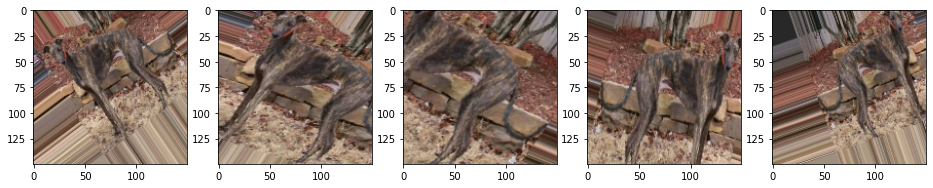

In [12]:
img_id = 2595
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


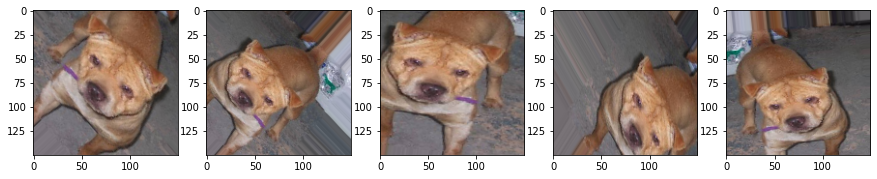

In [13]:
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [14]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [16]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.3))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.3))
model.add(BatchNormalization())


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.3))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 37, 37, 64)        2

In [20]:
history = model.fit_generator(train_generator, epochs=150,
                              validation_data=val_generator, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
100/100 [==============================] - 23s 150ms/step - loss: 0.8473 - accuracy: 0.5267 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 2/150
100/100 [==============================] - 15s 146ms/step - loss: 0.7067 - accuracy: 0.5079 - val_loss: 0.6926 - val_accuracy: 0.4950
Epoch 3/150
100/100 [==============================] - 15s 146ms/step - loss: 0.6982 - accuracy: 0.5149 - val_loss: 0.6937 - val_accuracy: 0.4990
Epoch 4/150
100/100 [==============================] - 15s 146ms/step - loss: 0.6920 - accuracy: 0.5175 - val_loss: 0.7003 - val_accuracy: 0.4990
Epoch 5/150
100/100 [==============================] - 15s 147ms/step - loss: 0.6872 - accuracy: 0.5483 - val_loss: 0.7128 - val_accuracy: 0.4990
Epoch 6/150
100/100 [==============================] - 15s 146ms/step - loss: 0.6878 - accuracy: 0.5449 - val_loss: 0.7092 - val_accuracy: 0.4990
Epoch 7/150
100/100 [==============================] - 15s 146ms/step - loss: 0.6767 - accuracy: 0.5767 - val_loss: 0.7229 -

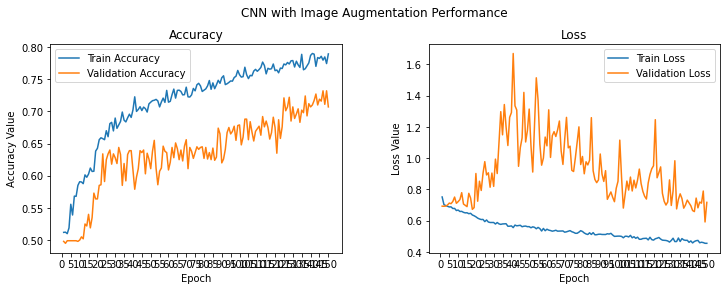

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 151))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 151, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 151, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [26]:
model.save('3-Image Aug-cnn.h5')